# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

1.a

[0.08108108108108109, 0.08108108108108109, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514

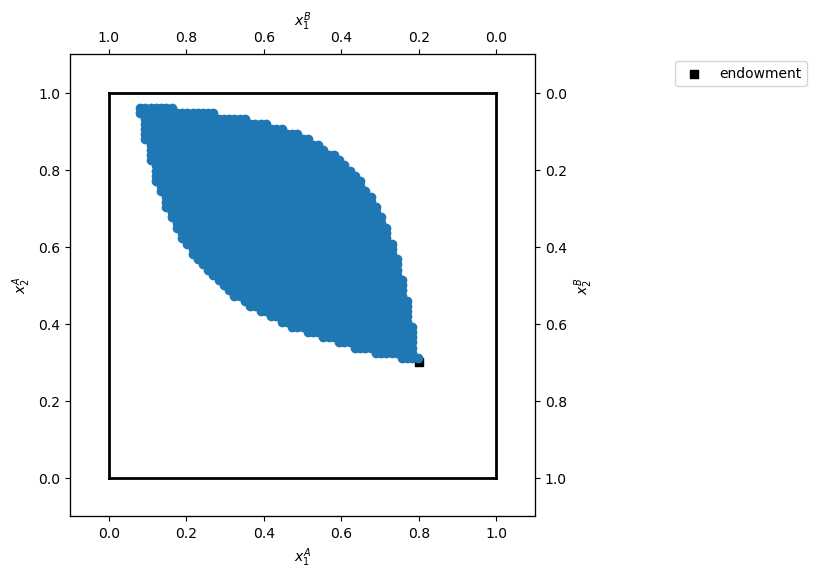

In [63]:
# code for solving the model (remember documentation and comments)

EEC = ExchangeEconomyClass()

N = 75

# Initializing for A

x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)
uA_endowment = EEC.utility_A(EEC.par.w1A, EEC.par.w2A)


# Initializing for B
        
x1B_vec = np.linspace(0,1,N)
x2B_vec = np.linspace(0,1,N)
uB_endowment = EEC.utility_B(EEC.par.w1B, EEC.par.w2B)


# Making a new matrix that contains all the values the satisfy constraints.

x1A_edgeworth = []
x2A_edgeworth = []
x1B_edgeworth = []
x2B_edgeworth = []

for x1A in x1A_vec:
    for x2A in x2A_vec:
        if EEC.utility_A(x1A, x2A) >= uA_endowment and EEC.utility_B(1-x1A, 1-x2A) >= uB_endowment:
                x1A_edgeworth.append(x1A)
                x2A_edgeworth.append(x2A)
                x1B_edgeworth.append(1-x1A)
                x2B_edgeworth.append(1-x2A)


print(x1A_edgeworth)
print(x2A_edgeworth)
print('\n')
print(x1B_edgeworth)
print(x2B_edgeworth)


# Plotting

par = EEC.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])
ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


plt.scatter(x1B_edgeworth, x2B_edgeworth)








# Question 2

Explain your code and procedure

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

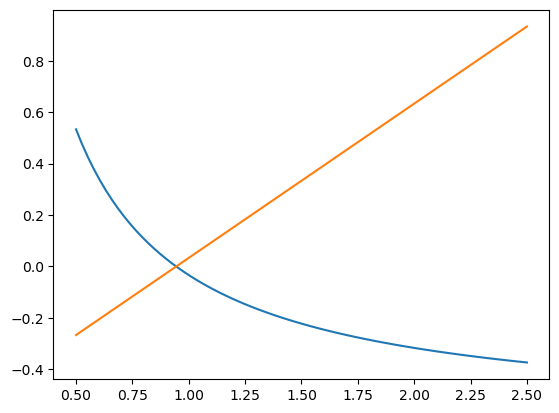

In [62]:


# Initializing price vector.
p1_vec = [0.5]
i = 1

while p1_vec[-1] < 2.5:
    p1_vec.append(0.5 + 2*i/N)
    i += 1

print(p1_vec)

excess_demand = []

for p1 in p1_vec:
    excess_demand.append(EEC.check_market_clearing(p1))

print(excess_demand)

plt.plot(p1_vec, excess_demand)





# Question 3

Explain your code and procedure

In [61]:
# code
p1_eq = 0
best = np.inf

for p1 in p1_vec:
    excess_demand_tuple = EEC.check_market_clearing(p1)
    sum = abs(excess_demand_tuple[0]) + abs(excess_demand_tuple[1])
  
    if sum < best:
        best = sum
        p1_eq = p1

print(best)
print(p1_eq)


0.010927738927739183
0.9533333333333334


Question 4

4.a

In [107]:
# code
p1_best = 0
best = 0

for p1 in p1_vec:
    demand_tuple = EEC.demand_B(p1)
    x1A = 1 - demand_tuple[0]
    x2A = 1 - demand_tuple[1]
    if x1A < 0 or x2A < 0:
        continue
    utility = EEC.utility_A(x1A, x2A)
    if utility > best:
        best = utility
        p1_best = p1
print(best)
print(p1_best)



0.633615985237553
1.8866666666666667


4.b

In [122]:
p1_best_positive = 0
best_positive = 0
p1_vec_positive = np.linspace(0, 3, 1000000)

for p1 in p1_vec_positive:
    if p1 == 0:
        continue
    demand_tuple_positive = EEC.demand_B(p1)
    x1A = 1 - demand_tuple_positive[0]
    x2A = 1 - demand_tuple_positive[1]
    if x1A < 0 or x2A < 0:
        continue
    utility_positive = EEC.utility_A(x1A, x2A)
    if utility_positive > best_positive:
        best_positive = utility_positive
        p1_best_positive = p1
print('\n')
print(best_positive)
print(p1_best_positive)



0.6336208506936494
1.8993468993468994


Question 5

5.a

In [148]:
best_utility_A = 0
best_utility_B = 0
best_x1A = 0
best_x2A = 0
best_x1B = 0
best_x2B = 0

for x2A_index, x1A in enumerate(x1A_edgeworth):
        utilityA = EEC.utility_A(x1A, x2A_edgeworth[x2A_index])
        utilityB = EEC.utility_B(1 - x1A, 1 - x2A_edgeworth[x2A_index])
        if utilityA > best_utility_A:
            best_utility_A = utilityA
            best_utility_B = utilityB
            best_x1A = x1A
            best_x2A = x2A_edgeworth[x2A_index]
            best_x1B = 1 - x1A
            best_x2B = 1 - x2A_edgeworth[x2A_index]

print('\n')
print(uB_endowment)
print(best_utility_B)
print(best_utility_A)
print('\n')
print(best_x1A)
print(best_x2A)
print('\n')
print(best_x1B)
print(best_x2B)






0.3036588971875663
0.305306809982723
0.741627044262768


0.5810810810810811
0.8378378378378379


0.41891891891891886
0.16216216216216206
